# SENTIMEN ANALIST PADA AKUN AHOK DJAROT

Project ini bertujuan untuk menganalisa sentimen yang berada di akun AhokDjarot, pada dataset terdiri dari sentimen Positive, Negative, dan Netral. Algoritma yang digunakan adalah naive bayes. project ini juga digunanakan untuk memenuhi tugas pada mata kuliah Sistem Cerdas. Dataset yang digunakan dari Program pelatihan Digital Talent Schoolarship 2019.

In [1]:
#import library yang dibutuhkan
import json
import numpy as np
import pandas as pd
import re
from pandas.io.json import json_normalize
import nltk

In [3]:
#load data
df = pd.read_json('Dataset/data_latih.json')
df.sample(5)

,akun,id_user,isi,sentimen,tanggal
249,@AhokDjarot,775873046804467712,RT @HumphreyDjemat: Ketum PPP Djan Faridz teru...,positif,Tue Apr 04 00:38:47 +0000 2017
353,@AhokDjarot,808141793862660097,RT @Maya_Rischa: 64. Nah.. Sekian saja dulu ya...,netral,Mon Apr 03 14:06:39 +0000 2017
13,@AhokDjarot,794537177472303104,RT @Jakarta_Kece: Kita adalah Warga Negara Rep...,positif,Tue Apr 04 13:35:33 +0000 2017
267,@AhokDjarot,1347567450,RT @alvin_ghifari: OK-OCE @AhokDjarot !!! #Pan...,negatif,Mon Apr 03 22:55:39 +0000 2017
500,@AhokDjarot,2384079912,@AhokDjarot @tonywibowo12 Sebuah terobosan dal...,positif,Mon Apr 03 13:48:39 +0000 2017


In [5]:
#lihat proporsi dari masing2 sentimen (count)
df['sentimen'].value_counts()

positif    291
negatif    181
netral     178
Name: sentimen, dtype: int64

In [6]:
#drop field yang tidak digunakan
data = df.drop(['akun','id_user', 'tanggal'], axis=1)
data.sample(5)

,isi,sentimen
65,RT @myra_drgspkga: @KompasTV @Rosianna766Hi @b...,positif
312,Waspadalah.. Waspadalah!! Makin banyak Ahli Fi...,negatif
35,RT @Jakarta_Kece: Pak Ahok Djarot paling kece ...,positif
612,"RT @Maya_Rischa: 14. Di sisi lain, @AhokDjarot...",netral
379,"RT @AhokDjarot: Seusai #AhokShow, Pak @basukib...",positif


## Proses Preprocessing

### 1. Clean Data

In [7]:
data_pre = data['isi']

In [8]:
#menghapus link
dataclearlink = []
for line in data_pre:
    result = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',line)
    dataclearlink.append(result)
    print(result)

RT @AhokDjarot: Penasaran sama #BasukiDjarot? Punya #PertanyaanKepo yg ingin dijawab? RT dgn #KepoinPelayanJakarta ! Pertanyaan terpilih ak…
@AhokDjarot Melayani warga jakarta mulai dari lahir dengan berbagai program.. #FreeAhok @basuki_btp 
@Lintank01 @AhokDjarot Golongan sumbu pendek lo. Fpi piaraan kluarga cendana. Bibib risiek ulama mesum. Bisanya demo gak mau kerja.
RT @RahyaMaya:  Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas... #FreeAhok @basuki_btp @AhokDjarot 
Prof. Edward Omar Sharif H. (Ahli Pidana) : Menurut pndpt Ahli, unsur Pasal 156A KUHP  #FreeAhok @basuki_btp @AhokDjarot
RT @RahyaMaya:  Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas... #FreeAhok @basuki_btp @AhokDjarot 
RT @Jakarta_Kece: Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta... #FreeAhok @basuki_btp @AhokDjarot @ezkisuyanto @mrshan…
RT @AhokDjarot: Penasaran sama #BasukiDjarot? Punya #PertanyaanKepo yg ingin dijawab? RT dgn #KepoinPelayanJakarta ! Pertanyaan terpilih ak…
15. Surah Al 

In [9]:
#clear Hastag
dataclearhastag = []
for line in dataclearlink:
    result = re.sub(r'#\S+','',line)
    dataclearhastag.append(result)
    print(result)

RT @AhokDjarot: Penasaran sama  Punya  yg ingin dijawab? RT dgn  ! Pertanyaan terpilih ak…
@AhokDjarot Melayani warga jakarta mulai dari lahir dengan berbagai program..  @basuki_btp 
@Lintank01 @AhokDjarot Golongan sumbu pendek lo. Fpi piaraan kluarga cendana. Bibib risiek ulama mesum. Bisanya demo gak mau kerja.
RT @RahyaMaya:  Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...  @basuki_btp @AhokDjarot 
Prof. Edward Omar Sharif H. (Ahli Pidana) : Menurut pndpt Ahli, unsur Pasal 156A KUHP   @basuki_btp @AhokDjarot
RT @RahyaMaya:  Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...  @basuki_btp @AhokDjarot 
RT @Jakarta_Kece: Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta...  @basuki_btp @AhokDjarot @ezkisuyanto @mrshan…
RT @AhokDjarot: Penasaran sama  Punya  yg ingin dijawab? RT dgn  ! Pertanyaan terpilih ak…
15. Surah Al Maidah 51 bukan diartikan untuk mengharuskan umat memilih pemimpin Muslim.  @basuki_btp @AhokDjarot
@MudasirRomini @AhokDjarot lah ahok di penjar

In [10]:
#menghapus simbol retweet
dataclearrt = []
for line in dataclearhastag:
    result = re.sub(r'RT','',line)
    dataclearrt.append(result)
    print(result)

 @AhokDjarot: Penasaran sama  Punya  yg ingin dijawab?  dgn  ! Pertanyaan terpilih ak…
@AhokDjarot Melayani warga jakarta mulai dari lahir dengan berbagai program..  @basuki_btp 
@Lintank01 @AhokDjarot Golongan sumbu pendek lo. Fpi piaraan kluarga cendana. Bibib risiek ulama mesum. Bisanya demo gak mau kerja.
 @RahyaMaya:  Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...  @basuki_btp @AhokDjarot 
Prof. Edward Omar Sharif H. (Ahli Pidana) : Menurut pndpt Ahli, unsur Pasal 156A KUHP   @basuki_btp @AhokDjarot
 @RahyaMaya:  Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...  @basuki_btp @AhokDjarot 
 @Jakarta_Kece: Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta...  @basuki_btp @AhokDjarot @ezkisuyanto @mrshan…
 @AhokDjarot: Penasaran sama  Punya  yg ingin dijawab?  dgn  ! Pertanyaan terpilih ak…
15. Surah Al Maidah 51 bukan diartikan untuk mengharuskan umat memilih pemimpin Muslim.  @basuki_btp @AhokDjarot
@MudasirRomini @AhokDjarot lah ahok di penjara.Bersih2 penj

In [11]:
#menghapus username
dataclearusername = []
for line in dataclearrt:
    result = re.sub(r'@\S+', '', line)
    dataclearusername.append(result)
    print(result)

  Penasaran sama  Punya  yg ingin dijawab?  dgn  ! Pertanyaan terpilih ak…
 Melayani warga jakarta mulai dari lahir dengan berbagai program..   
  Golongan sumbu pendek lo. Fpi piaraan kluarga cendana. Bibib risiek ulama mesum. Bisanya demo gak mau kerja.
   Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...    
Prof. Edward Omar Sharif H. (Ahli Pidana) : Menurut pndpt Ahli, unsur Pasal 156A KUHP    
   Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...    
  Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta...     
  Penasaran sama  Punya  yg ingin dijawab?  dgn  ! Pertanyaan terpilih ak…
15. Surah Al Maidah 51 bukan diartikan untuk mengharuskan umat memilih pemimpin Muslim.   
  lah ahok di penjara.Bersih2 penjara aja biar dekat dgn ahok
   Aku siap menunggu program unggulan dari Pak Ahok Djarot...    
   Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...    
     Ikuuut!!
  Kita adalah Warga Negara Republik Indonesia... Begitu juga dengan sosok Pak Ahok..    


In [12]:
#menghapus angka
dataclearangka = []
for line in dataclearusername:
    result = re.sub('\d', ' ', line)
    dataclearangka.append(result)
    print(result)

  Penasaran sama  Punya  yg ingin dijawab?  dgn  ! Pertanyaan terpilih ak…
 Melayani warga jakarta mulai dari lahir dengan berbagai program..   
  Golongan sumbu pendek lo. Fpi piaraan kluarga cendana. Bibib risiek ulama mesum. Bisanya demo gak mau kerja.
   Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...    
Prof. Edward Omar Sharif H. (Ahli Pidana) : Menurut pndpt Ahli, unsur Pasal    A KUHP    
   Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...    
  Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta...     
  Penasaran sama  Punya  yg ingin dijawab?  dgn  ! Pertanyaan terpilih ak…
  . Surah Al Maidah    bukan diartikan untuk mengharuskan umat memilih pemimpin Muslim.   
  lah ahok di penjara.Bersih  penjara aja biar dekat dgn ahok
   Aku siap menunggu program unggulan dari Pak Ahok Djarot...    
   Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas...    
     Ikuuut!!
  Kita adalah Warga Negara Republik Indonesia... Begitu juga dengan sosok Pak Ahok..    


In [13]:
#menghapus punctuation atau tanda baca
dataclearpunctuation = []
for line in dataclearangka:
    result = re.sub(r'[^\w\s]',' ', line)
    dataclearpunctuation.append(result)
    print(result)

  Penasaran sama  Punya  yg ingin dijawab   dgn    Pertanyaan terpilih ak 
 Melayani warga jakarta mulai dari lahir dengan berbagai program     
  Golongan sumbu pendek lo  Fpi piaraan kluarga cendana  Bibib risiek ulama mesum  Bisanya demo gak mau kerja 
   Pak Ahok itu didzolimi    Aku yakin Pak Ahok bebas       
Prof  Edward Omar Sharif H   Ahli Pidana    Menurut pndpt Ahli  unsur Pasal    A KUHP    
   Pak Ahok itu didzolimi    Aku yakin Pak Ahok bebas       
  Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta        
  Penasaran sama  Punya  yg ingin dijawab   dgn    Pertanyaan terpilih ak 
    Surah Al Maidah    bukan diartikan untuk mengharuskan umat memilih pemimpin Muslim    
  lah ahok di penjara Bersih  penjara aja biar dekat dgn ahok
   Aku siap menunggu program unggulan dari Pak Ahok Djarot       
   Pak Ahok itu didzolimi    Aku yakin Pak Ahok bebas       
     Ikuuut  
  Kita adalah Warga Negara Republik Indonesia    Begitu juga dengan sosok Pak Ahok      


In [14]:
#menghapus emoticon
dataclearemoticon = []
for line in dataclearpunctuation:
    result = re.sub(r'<.*>', ' ', line)
    dataclearemoticon.append(result)
    print(result)

  Penasaran sama  Punya  yg ingin dijawab   dgn    Pertanyaan terpilih ak 
 Melayani warga jakarta mulai dari lahir dengan berbagai program     
  Golongan sumbu pendek lo  Fpi piaraan kluarga cendana  Bibib risiek ulama mesum  Bisanya demo gak mau kerja 
   Pak Ahok itu didzolimi    Aku yakin Pak Ahok bebas       
Prof  Edward Omar Sharif H   Ahli Pidana    Menurut pndpt Ahli  unsur Pasal    A KUHP    
   Pak Ahok itu didzolimi    Aku yakin Pak Ahok bebas       
  Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta        
  Penasaran sama  Punya  yg ingin dijawab   dgn    Pertanyaan terpilih ak 
    Surah Al Maidah    bukan diartikan untuk mengharuskan umat memilih pemimpin Muslim    
  lah ahok di penjara Bersih  penjara aja biar dekat dgn ahok
   Aku siap menunggu program unggulan dari Pak Ahok Djarot       
   Pak Ahok itu didzolimi    Aku yakin Pak Ahok bebas       
     Ikuuut  
  Kita adalah Warga Negara Republik Indonesia    Begitu juga dengan sosok Pak Ahok      


In [15]:
#menghapus spasi berlebih
datacleardoublespace = []
for line in dataclearemoticon:
    result = re.sub(r'\s+', ' ', line)
    datacleardoublespace.append(result)
    print(result)

 Penasaran sama Punya yg ingin dijawab dgn Pertanyaan terpilih ak 
 Melayani warga jakarta mulai dari lahir dengan berbagai program 
 Golongan sumbu pendek lo Fpi piaraan kluarga cendana Bibib risiek ulama mesum Bisanya demo gak mau kerja 
 Pak Ahok itu didzolimi Aku yakin Pak Ahok bebas 
Prof Edward Omar Sharif H Ahli Pidana Menurut pndpt Ahli unsur Pasal A KUHP 
 Pak Ahok itu didzolimi Aku yakin Pak Ahok bebas 
 Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta 
 Penasaran sama Punya yg ingin dijawab dgn Pertanyaan terpilih ak 
 Surah Al Maidah bukan diartikan untuk mengharuskan umat memilih pemimpin Muslim 
 lah ahok di penjara Bersih penjara aja biar dekat dgn ahok
 Aku siap menunggu program unggulan dari Pak Ahok Djarot 
 Pak Ahok itu didzolimi Aku yakin Pak Ahok bebas 
 Ikuuut 
 Kita adalah Warga Negara Republik Indonesia Begitu juga dengan sosok Pak Ahok 
 Wkwkwk ada udang dbalik batu itu 
 Di dzolimi bgmana Wong dah jelazz dia yg mendolimi umat islam sampean sehat

In [16]:
#menghapus baris baru
dataclearline = []
for line in datacleardoublespace:
    result = re.sub('\n', ' ', line)
    dataclearline.append(result)
    print(result)

 Penasaran sama Punya yg ingin dijawab dgn Pertanyaan terpilih ak 
 Melayani warga jakarta mulai dari lahir dengan berbagai program 
 Golongan sumbu pendek lo Fpi piaraan kluarga cendana Bibib risiek ulama mesum Bisanya demo gak mau kerja 
 Pak Ahok itu didzolimi Aku yakin Pak Ahok bebas 
Prof Edward Omar Sharif H Ahli Pidana Menurut pndpt Ahli unsur Pasal A KUHP 
 Pak Ahok itu didzolimi Aku yakin Pak Ahok bebas 
 Pak Ahok Djarot paling kece badai yang bisa menata kota Jakarta 
 Penasaran sama Punya yg ingin dijawab dgn Pertanyaan terpilih ak 
 Surah Al Maidah bukan diartikan untuk mengharuskan umat memilih pemimpin Muslim 
 lah ahok di penjara Bersih penjara aja biar dekat dgn ahok
 Aku siap menunggu program unggulan dari Pak Ahok Djarot 
 Pak Ahok itu didzolimi Aku yakin Pak Ahok bebas 
 Ikuuut 
 Kita adalah Warga Negara Republik Indonesia Begitu juga dengan sosok Pak Ahok 
 Wkwkwk ada udang dbalik batu itu 
 Di dzolimi bgmana Wong dah jelazz dia yg mendolimi umat islam sampean sehat

### 2. Proses Casefolding

In [17]:
#casefolding
datacase = []
for line in dataclearline:
    case = line.lower()
    datacase.append(case)
    print(case)

 penasaran sama punya yg ingin dijawab dgn pertanyaan terpilih ak 
 melayani warga jakarta mulai dari lahir dengan berbagai program 
 golongan sumbu pendek lo fpi piaraan kluarga cendana bibib risiek ulama mesum bisanya demo gak mau kerja 
 pak ahok itu didzolimi aku yakin pak ahok bebas 
prof edward omar sharif h ahli pidana menurut pndpt ahli unsur pasal a kuhp 
 pak ahok itu didzolimi aku yakin pak ahok bebas 
 pak ahok djarot paling kece badai yang bisa menata kota jakarta 
 penasaran sama punya yg ingin dijawab dgn pertanyaan terpilih ak 
 surah al maidah bukan diartikan untuk mengharuskan umat memilih pemimpin muslim 
 lah ahok di penjara bersih penjara aja biar dekat dgn ahok
 aku siap menunggu program unggulan dari pak ahok djarot 
 pak ahok itu didzolimi aku yakin pak ahok bebas 
 ikuuut 
 kita adalah warga negara republik indonesia begitu juga dengan sosok pak ahok 
 wkwkwk ada udang dbalik batu itu 
 di dzolimi bgmana wong dah jelazz dia yg mendolimi umat islam sampean sehat

In [18]:
#ini dipergunakan menghapus kata double
doublekata=[]
for line in datacase:
    kata = re.compile(r"(.)\1{1,}", re.DOTALL)
    kata2 = kata.sub(r"\1", line)
    doublekata.append(kata2)
    print(kata2)

 penasaran sama punya yg ingin dijawab dgn pertanyan terpilih ak 
 melayani warga jakarta mulai dari lahir dengan berbagai program 
 golongan sumbu pendek lo fpi piaran kluarga cendana bibib risiek ulama mesum bisanya demo gak mau kerja 
 pak ahok itu didzolimi aku yakin pak ahok bebas 
prof edward omar sharif h ahli pidana menurut pndpt ahli unsur pasal a kuhp 
 pak ahok itu didzolimi aku yakin pak ahok bebas 
 pak ahok djarot paling kece badai yang bisa menata kota jakarta 
 penasaran sama punya yg ingin dijawab dgn pertanyan terpilih ak 
 surah al maidah bukan diartikan untuk mengharuskan umat memilih pemimpin muslim 
 lah ahok di penjara bersih penjara aja biar dekat dgn ahok
 aku siap menungu program ungulan dari pak ahok djarot 
 pak ahok itu didzolimi aku yakin pak ahok bebas 
 ikut 
 kita adalah warga negara republik indonesia begitu juga dengan sosok pak ahok 
 wkwkwk ada udang dbalik batu itu 
 di dzolimi bgmana wong dah jelaz dia yg mendolimi umat islam sampean sehat 
 conto

### 3. Proses Slangword

In [24]:
#proses slangword atau memperbaiki kata typo
slang_file = [line.strip().split(",", 1) for line in open("Dataset/slangword.csv")]
slang = {k:v for k, v in slang_file}
dataslag = []
for line in doublekata:
    slangword = re.sub(r"\w+", lambda m: slang.get(m.group(0), m.group(0)), line)
    dataslag.append(slangword)
    print(re.sub(r"\w+", lambda m: slang.get(m.group(0), m.group(0)), line))

 penasaran sama punya yang ingin dijawab dengan pertanyan terpilih saya 
 melayani warga jakarta mulai dari lahir dengan berbagai program 
 golongan sumbu pendek kamu fpi peliharaan kluarga cendana bibib risiek ulama mesum bisanya demo gak mau kerja 
 pak ahok itu didzolimi saya yakin pak ahok bebas 
prof edward omar sharif h ahli pidana menurut pendapat ahli unsur pasal a kuhp 
 pak ahok itu didzolimi saya yakin pak ahok bebas 
 pak ahok djarot paling kece badai yang bisa menata kota jakarta 
 penasaran sama punya yang ingin dijawab dengan pertanyan terpilih saya 
 surah al maidah bukan diartikan untuk mengharuskan umat memilih pemimpin muslim 
 lah ahok di penjara bersih penjara saja biar dekat dengan ahok
 saya siap menunggu program ungulan dari pak ahok djarot 
 pak ahok itu didzolimi saya yakin pak ahok bebas 
 ikut 
 kita adalah warga negara republik indonesia begitu juga dengan sosok pak ahok 
 wkwkwk ada udang dbalik batu itu 
 di dzolimi bagaimana wong dah jelas dia yang mendo

### 4. Proses Stemming

In [26]:
#proses stemming 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

datastemmer = []
for line in dataslag:
    katadasar = stemmer.stem(line)
    datastemmer.append(katadasar)
print(datastemmer)

['penasaran sama punya yang ingin jawab dengan pertanyan pilih saya', 'layan warga jakarta mulai dari lahir dengan bagai program', 'golong sumbu pendek kamu fpi pelihara kluarga cendana bibib risiek ulama mesum bisa demo gak mau kerja', 'pak ahok itu didzolimi saya yakin pak ahok bebas', 'prof edward omar sharif h ahli pidana turut dapat ahli unsur pasal a kuhp', 'pak ahok itu didzolimi saya yakin pak ahok bebas', 'pak ahok djarot paling kece badai yang bisa tata kota jakarta', 'penasaran sama punya yang ingin jawab dengan pertanyan pilih saya', 'surah al maidah bukan arti untuk harus umat pilih pimpin muslim', 'lah ahok di penjara bersih penjara saja biar dekat dengan ahok', 'saya siap tunggu program ungulan dari pak ahok djarot', 'pak ahok itu didzolimi saya yakin pak ahok bebas', 'ikut', 'kita adalah warga negara republik indonesia begitu juga dengan sosok pak ahok', 'wkwkwk ada udang dbalik batu itu', 'di dzolimi bagaimana wong dah jelas dia yang mendolimi umat islam kamu sehat', '

### 5. Proses stopword & Tokenize

In [27]:
#Stopwords and Tokenizing
stopwords = open('Dataset/stopword_list_TALA.txt', 'r').read()
tweetdata = []
datafinal = []
df = []

for line in datastemmer:
   word_token=nltk.word_tokenize(line)
   word_token=[word for word in word_token if not word in stopwords and not word[0].isdigit()]
   datafinal.append(word_token)
   df.append(" ".join(word_token))
for l in datafinal:
    tweetdata+= l
final_data={v: tweetdata.count(v) for v in set(tweetdata)}

print(datafinal)

[['penasaran', 'pertanyan', 'pilih'], ['layan', 'warga', 'jakarta', 'lahir', 'program'], ['golong', 'sumbu', 'pendek', 'fpi', 'pelihara', 'kluarga', 'cendana', 'bibib', 'risiek', 'ulama', 'mesum', 'demo'], ['ahok', 'didzolimi', 'ahok', 'bebas'], ['prof', 'edward', 'omar', 'sharif', 'ahli', 'pidana', 'ahli', 'unsur', 'pasal', 'kuhp'], ['ahok', 'didzolimi', 'ahok', 'bebas'], ['ahok', 'djarot', 'kece', 'badai', 'tata', 'kota', 'jakarta'], ['penasaran', 'pertanyan', 'pilih'], ['surah', 'maidah', 'umat', 'pilih', 'pimpin', 'muslim'], ['ahok', 'penjara', 'bersih', 'penjara', 'biar', 'ahok'], ['tunggu', 'program', 'ungulan', 'ahok', 'djarot'], ['ahok', 'didzolimi', 'ahok', 'bebas'], [], ['warga', 'negara', 'republik', 'indonesia', 'sosok', 'ahok'], ['wkwkwk', 'udang', 'dbalik', 'batu'], ['dzolimi', 'mendolimi', 'umat', 'islam', 'sehat'], ['contoh', 'analogi', 'curi', 'indonesia', 'dasar', 'hukum', 'positif', 'hukum', 'pidana', 'penjara'], ['nista', 'agama'], ['kultwit', 'poin', 'poin', 'saksi

In [29]:
#ubah ke data dataFrame
df_bersih = pd.DataFrame({"isi":datafinal})
def fit_stopword(text):
    text = np.array(text)
    text = ' '.join(text)
    return text

df_bersih['Data Bersih']= df_bersih['isi'].apply(lambda x: fit_stopword(x))

In [34]:
data_bersih = pd.concat([df_bersih, data['sentimen']], axis=1, join='inner')
data_bersih.head(5)

,isi,Data Bersih,sentimen
0,"[penasaran, pertanyan, pilih]",penasaran pertanyan pilih,netral
1,"[layan, warga, jakarta, lahir, program]",layan warga jakarta lahir program,positif
2,"[golong, sumbu, pendek, fpi, pelihara, kluarga...",golong sumbu pendek fpi pelihara kluarga cenda...,negatif
3,"[ahok, didzolimi, ahok, bebas]",ahok didzolimi ahok bebas,positif
4,"[prof, edward, omar, sharif, ahli, pidana, ahl...",prof edward omar sharif ahli pidana ahli unsur...,positif


In [36]:
#menghapus data duplicate
data_bersih = data_bersih.drop_duplicates(subset='Data Bersih', keep='first')
data_bersih.head(5)

,isi,Data Bersih,sentimen
0,"[penasaran, pertanyan, pilih]",penasaran pertanyan pilih,netral
1,"[layan, warga, jakarta, lahir, program]",layan warga jakarta lahir program,positif
2,"[golong, sumbu, pendek, fpi, pelihara, kluarga...",golong sumbu pendek fpi pelihara kluarga cenda...,negatif
3,"[ahok, didzolimi, ahok, bebas]",ahok didzolimi ahok bebas,positif
4,"[prof, edward, omar, sharif, ahli, pidana, ahl...",prof edward omar sharif ahli pidana ahli unsur...,positif


In [38]:
#lihat proporsi dari masing2 sentimen (count)
data_bersih['sentimen'].value_counts()

positif    211
negatif    150
netral     112
Name: sentimen, dtype: int64

## Visualisasi

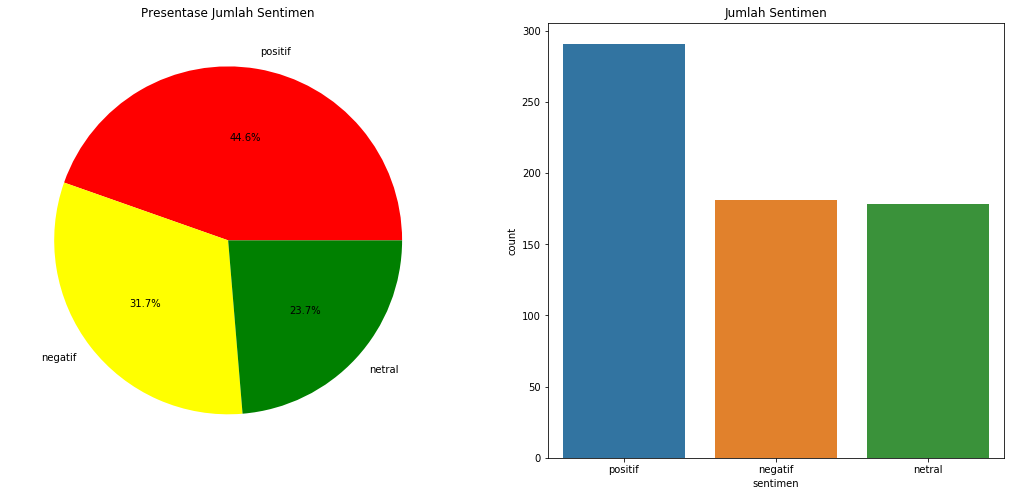

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(1,2,figsize=(18,8))
data_bersih.sentimen.value_counts().plot(kind='pie',ax=ax[0],autopct='%1.1f%%', colors=["red", "yellow",'green'])
ax[0].set_title('Presentase Jumlah Sentimen')
ax[0].set_ylabel('')
sns.countplot('sentimen',data=data,ax=ax[1],order=data['sentimen'].value_counts().index)
ax[1].set_title('Jumlah Sentimen')
plt.show()

In [41]:
#Split Data

data_neg = data_bersih[data_bersih['sentimen'] == 'negatif' ]
data_neg = data_neg ['isi']

data_pos = data_bersih[data_bersih['sentimen'] == 'positif' ]
data_pos = data_pos ['isi']

data_pos = data_bersih[data_bersih['sentimen'] == 'netral' ]
data_pos = data_pos ['isi']

In [42]:
#Merubah Data str
a = str(data_neg)
negatif =re.sub(r"'","",a)

c = str(data_pos)
positif =re.sub(r"'","",c)

### Visualisasi Wordcloud

In [43]:
#Wordcloud
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['font.size']=12 #10
mpl.rcParams['savefig.dpi']=100 #72
mpl.rcParams['figure.subplot.bottom']=.1

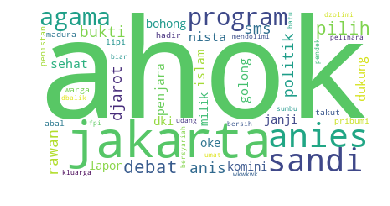

In [44]:
#WordCloud Negatif
wordcloud = WordCloud(collocations = False,
                     background_color='white',
                     stopwords=stopwords,
                     max_words=50,
                     max_font_size=200,
                     random_state=42
                     ).generate(negatif)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

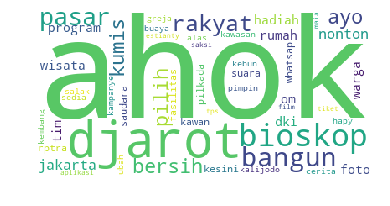

In [45]:
#WordCloud Positif
wordcloud = WordCloud(collocations = False,
                     background_color='white',
                     stopwords=stopwords,
                     max_words=50,
                     max_font_size=200,
                     random_state=42
                     ).generate(positif)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Proses TF-IDF

In [46]:
#TF-IDF
from pandas import DataFrame
from sklearn.feature_extraction.text import TfidfTransformer
import pickle
from sklearn.feature_extraction.text import CountVectorizer

Y = data_bersih['sentimen']
Y_A = pd.DataFrame(Y)

#vectorize
bow_transformer = CountVectorizer()
print(data_bersih['Data Bersih'].shape)
X = bow_transformer.fit_transform(data_bersih['Data Bersih'])

print(X.toarray())
print('Shape: ', X.shape)
print('Non-Zero: ', X.nnz)

#save the count
filename1 = 'Dataset/count_vectorize.pkl'
pickle.dump(bow_transformer, open(filename1, 'wb'))

#TFIDF transformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X)
X = tf_transformer.transform(X)
print(X.shape)

#save the TFIDF to disk
filename1 = 'Dataset/tfidf_transformer.pkl'
pickle.dump(tf_transformer, open(filename1,'wb'))

(473,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape:  (473, 1200)
Non-Zero:  2719
(473, 1200)


## Proses Klasifikasi dengan Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [48]:
# split data test dan training
X_train, X_test, Y_train, Y_test =train_test_split(X,Y_A,test_size=0.20,random_state=0)

In [49]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = MultinomialNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train, Y_train)
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(X_test)
y_pred

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['positif', 'netral', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'negatif', 'positif', 'negatif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'negatif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'negatif', 'positif', 'negatif',
       'negatif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'negatif', 'positif', 'negatif', 'positif', 'positif',
       'positif', 'positif', 'negatif', 'positif', '

## Proses Evaluasi

In [50]:
#evaluasi confussion matriks
confusion_matrix(Y_test, y_pred) 

array([[ 8,  0, 20],
       [ 1,  1, 28],
       [ 2,  0, 35]], dtype=int64)

In [ ]:
#visualisasi akurasi
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
label = ['Positif','Negatif']
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt=".0f", ax=ax)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['positif','negatif','netral']); 
ax.yaxis.set_ticklabels(['positif','negatif','netral']);
plt.show()